# 가즈아!!

In [1]:
from rok_launcher import NoxManager

import OCRHelper as OH
import datetime
import glob

config = {
    'nox_size' : (720, 1280)
}

from util import get_screen
from configs import *
import matplotlib.pyplot as plt
import cv2

from multiprocessing import Process, Queue
import util

Loaded id2name.xlsx as id2name


-------------------------------------
Run Nox Application and Press Any Key
Now Find Nox Position
2.2424204349517822


Refining Nox Position
0.26486706733703613


Finished


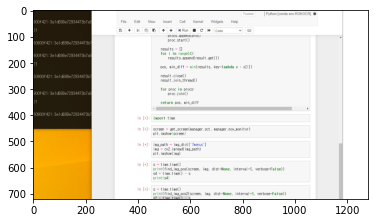

In [2]:
manager = NoxManager(config=config, verbose=False)

In [3]:
from f import find_img_pos_multi, find_img_pos_single

In [4]:
def find_img_pos2(screen, img, dist=None, interval=5, verbose=False):
    H, W = screen.shape[0:2]
    h, w = img.shape[0:2]
    min_diff = 10000
    pos = np.array([0,0])
    all_pixel_num = (H-h+1)*(W-w+1)
    
    Ws = [0, W//2, W]
    result = Queue()
    procs = []
    for i in range(2):
        proc = Process(target=find_img_pos_multi, args=(screen, img, Ws[i], Ws[i+1], result))
        procs.append(proc)
        proc.start()
    
    results = []
    for i in range(2):
        results.append(result.get())
    
    pos, min_diff = min(results, key=lambda x : x[1])
    
    result.close()
    result.join_thread()
    
    for proc in procs:
        proc.join()
    
    return pos, min_diff

In [5]:
def find_img_pos(screen, img, dist=None, interval=5, verbose=False):
    H, W = screen.shape[0:2]
    h, w = img.shape[0:2]
    min_diff = 10000
    pos = np.array([0,0])
    all_pixel_num = (H-h+1)*(W-w+1)
    
    Ws = [0, 1*W//4, 2*W//4, 3*W//4, W]
    result = Queue()
    procs = []
    for i in range(4):
        proc = Process(target=find_img_pos_multi, args=(screen, img, Ws[i], Ws[i+1], result))
        procs.append(proc)
        proc.start()
    
    results = []
    for i in range(4):
        results.append(result.get())
    
    pos, min_diff = min(results, key=lambda x : x[1])
    
    result.close()
    result.join_thread()
    
    for proc in procs:
        proc.join()
    
    return pos, min_diff

In [6]:
import time

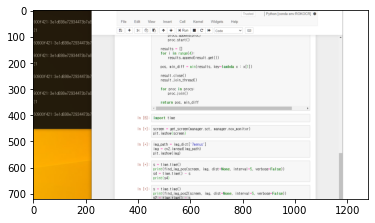

In [7]:
screen = get_screen(manager.sct, manager.nox_monitor)
plt.imshow(screen)

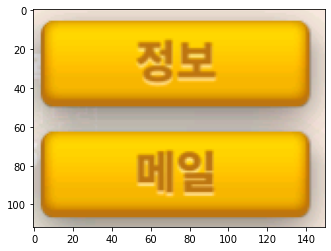

In [24]:
img_path = img_dict['2menus']
img = cv2.imread(img_path)
plt.imshow(img)

In [25]:
s = time.time()
print(find_img_pos(screen, img, dist=None, interval=5, verbose=False))
s4 = time.time() - s
print(s4)

(array([ 60, 380]), 0.21272507350309988)
1.8501524925231934


In [26]:
s = time.time()
print(find_img_pos2(screen, img, dist=None, interval=5, verbose=False))
s2 = time.time() - s
print(s2)

(array([ 60, 380]), 0.21272507350309988)
1.888251543045044


In [27]:
s = time.time()
print(find_img_pos_single(screen, img, dist=None, interval=5, verbose=False))
s1 = time.time() - s
print(s1)

(array([ 60, 380]), 0.21272507350309988)
2.5663180351257324


In [28]:
s2/s1

0.7357823610324791

In [29]:
s4/s1

0.720936558602546

In [30]:
s = time.time()
manager.get_relative_pos(img_path, div=1, single=True)
print(time.time() - s)

2.506121873855591
2.5256407260894775


In [31]:
s = time.time()
manager.get_relative_pos(img_path, div=1, single=False)
print(time.time() - s)

1.7756433486938477
1.797140121459961


In [ ]:
manager.get_relative_mouse_pos()